In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import math
from __future__ import print_function
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data=pd.read_excel('2018_MCM-ICM_Problems/ProblemCData.xlsx')

In [3]:
print(data.shape)

(105744, 4)


In [4]:
msn=data.iloc[:,0].values
stateCode=data.iloc[:,1].values
year=data.iloc[:,2].values
da=data.iloc[:,3].values

In [5]:
print(msn[0])
print(stateCode[0])
print(year[0])
print(da[0])
msnSet=sorted(set(msn))
print(len(msnSet))
stateSet=sorted(set(stateCode))
print(stateSet)

ABICB
AZ
1960
0.0
583
['AZ', 'CA', 'NM', 'TX']


In [6]:
data=np.zeros(dtype=np.float32,shape=(583,50,4))
for i in range(len(msn)):
    index=msnSet.index(msn[i])
    num=int(year[i]-1960)
    dim=stateSet.index(stateCode[i])
    data[index,num,dim]=da[i]
            
    

In [7]:
#原煤 o．755 9
#燃料油0．6185
#洗精煤0．7559
#其他石油制品0．5857
#焦炭0．8550
#液化石油气0．5042
#其他焦化产品0．6449
#天然气0．4483
#原油0．5857
#焦炉煤气0．3548
#汽油0．5538
#炼厂干气0．4602
#煤油0．5714 
#其他煤气0．3548
#柴油0．5921

In [8]:
def predict(data):
    dta=pd.Series(data)
    dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
    dta.plot(figsize=(12,8))

In [9]:
#常规信息
TPOPP=data[msnSet.index('TPOPP')]   #总人口
TETPB=data[msnSet.index('TETPB')]   #人均消费能量
TETGR=data[msnSet.index('TETGR')]   #单位 1000Btu/2000美元
GDPRV=data[msnSet.index('GDPRV')]   #当前GDP
GDPRX=data[msnSet.index('GDPRX')]   #真实GDP

In [10]:
#沥青和道路石油 22
ARICD=data[msnSet.index('ARICD')]    #工业能量
ARICV=data[msnSet.index('ARICV')]    #工业消费
ARTCB=data[msnSet.index('ARTCB')]    #总能量
ARTCV=data[msnSet.index('ARTCB')]    #总消费
AROCB=ARTCB-ARICD                    #其他领域能量
AROCV=ARTCV-ARICV                    #其他领域消费

In [11]:
#航空汽油(其他领域基本没有消费) 19.1
AVACB=data[msnSet.index('AVACB')]   #交通能量
AVACV=data[msnSet.index('AVACV')]   #交通消费
AVTCB=data[msnSet.index('AVTCB')]   #总能量
AVTCV=data[msnSet.index('AVTCV')]   #总消费
AVOCB=AVTCB-AVACB                   #其他领域能量
AVOCV=AVTCV-AVACV                   #其他领域消费

In [12]:
#生物质总消费（没有成本） 30.5
BMTCB=data[msnSet.index('BMTCB')]   #总能量

In [13]:
#煤  25.8
CLCCB=data[msnSet.index('CLCCB')]   #商业能量
CLCCV=data[msnSet.index('CLCCV')]   #商业消费
CLICB=data[msnSet.index('CLICB')]   #工业能量
CLICV=data[msnSet.index('CLICV')]   #工业消费
CLTCB=data[msnSet.index('CLTCB')]   #总能量
CLTCV=data[msnSet.index('CLTCV')]   #总消费
CLOCB=CLTCB-CLICB-CLCCB             #其他领域能量
CLOCV=CLTCV-CLICV-CLCCV             #其他领域消费

In [14]:
#馏分燃料 21.1
DFCCB=data[msnSet.index('DFCCB')]   #商业能量
DFCCV=data[msnSet.index('DFCCV')]   #商业消费
DFICB=data[msnSet.index('DFICB')]   #工业能量
DFICV=data[msnSet.index('DFICV')]   #工业消费
DFTCB=data[msnSet.index('DFTCB')]   #总能量
DFTCV=data[msnSet.index('DFTCV')]   #总消费
DFOCB=DFTCB-DFICB-DFCCB             #其他领域能量
DFOCV=DFTCV-DFICV-DFCCV             #其他领域消费

In [15]:
#电力
ELEXB=data[msnSet.index('ELEXB')]   #出口到美国能量
ELEXV=data[msnSet.index('ELEXV')]   #出口到美国获利
ELIMB=data[msnSet.index('ELIMB')]   #从美国进口能量
ELIMV=data[msnSet.index('ELIMV')]   #从美国进口消费
ELOBB=ELEXB-ELIMB                   #电力能量进出口差
ELOBV=ELEXV-ELIMV                   #电力消费进出口差

In [16]:
#电力消耗
ESCCB=data[msnSet.index('ESCCB')]   #商业能量
ESCCV=data[msnSet.index('ESCCV')]   #商业消费
ESICB=data[msnSet.index('ESCCB')]   #工业能量
ESICV=data[msnSet.index('ESCCV')]   #工业消费
ESTCB=data[msnSet.index('ESTCB')]   #总能量
ESTCV=data[msnSet.index('ESTCV')]   #总消费
ESOCB=ESTCB-ESICB-ESCCB             #其他领域的能量
ESOCV=ESTCV-ESICV-ESCCV             #其他领域的消费

In [17]:
#乙醇燃料 16
EMCCB=data[msnSet.index('EMCCB')]   #商业能量
EMCCV=data[msnSet.index('EMCCV')]   #商业消费
EMICB=data[msnSet.index('EMICB')]   #工业能量
EMICV=data[msnSet.index('EMICV')]   #工业消费
EMTCB=data[msnSet.index('EMTCB')]   #总能量
EMTCV=data[msnSet.index('EMTCV')]   #总消费
EMOCB=EMTCB-EMICB-EMCCB             #其他领域能量
EMOCV=EMTCV-EMICV-EMCCV             #其他领域消费

In [18]:
#石化燃料（仅有工业部门） 20
FSICB=data[msnSet.index('FSICB')]   #工业能量
FSICV=data[msnSet.index('FSICV')]   #工业消费

In [19]:
#地热（清洁能源）只有 ca有这个能源
GECCB=data[msnSet.index('GECCB')]   #商业能量
GEICB=data[msnSet.index('GEICB')]   #工业能量
GETCB=data[msnSet.index('GETCB')]   #总能量
GEOCB=GETCB-GEICB-GECCB             #其他领域

In [20]:
#水力发电
HYCCB=data[msnSet.index('HYCCB')]   #商业能量
HYICB=data[msnSet.index('HYICB')]   #工业能量
HYTCB=data[msnSet.index('HYTCB')]   #总能量

In [21]:
#风能发电
WYTCB=data[msnSet.index('WYTCB')]   #总能量

In [22]:
#喷气燃料  20
JFACB=data[msnSet.index('JFACB')]   #交通能量
JFACV=data[msnSet.index('JFACV')]   #交通消费
JFTCB=data[msnSet.index('JFTCB')]   #总能量
JFTCV=data[msnSet.index('JFTCV')]   #总消费
JFOCB=JFTCB-JFACB                   #其他领域能量
JFOCV=JFTCV-JFACV                   #其他领域消费

In [23]:
#煤油 19.6
KSCCB=data[msnSet.index('KSCCB')]   #商业能量
KSCCV=data[msnSet.index('KSCCV')]   #商业消费
KSICB=data[msnSet.index('KSICB')]   #工业能量
KSICV=data[msnSet.index('KSICV')]   #工业消费
KSTCB=data[msnSet.index('KSTCB')]   #总能量
KSTCV=data[msnSet.index('KSTCV')]   #总消费
KSOCB=KSTCB-KSICB-KSCCB              #其他领域能量
KSOCV=KSTCV-KSICV-KSCCV              #其他领域消费

In [24]:
#液化石油气  17.2
LGCCB=data[msnSet.index('LGCCB')]   #商业能量
LGCCV=data[msnSet.index('LGCCV')]   #商业消费
LGICB=data[msnSet.index('LGICB')]   #工业能量
LGICV=data[msnSet.index('LGICV')]   #工业消费
LGTCB=data[msnSet.index('LGTCB')]   #总能量
LGTCV=data[msnSet.index('LGTCV')]   #总消费
LGOCB=LGTCB-LGICB-LGCCB             #其他领域能量
LGOCV=LGTCV-LGICV-LGCCV             #其他领域消费

In [25]:
#润滑油 20
LUICB=data[msnSet.index('LUICB')]   #工业能量
LUICV=data[msnSet.index('LUICV')]   #工业消费
LUTCB=data[msnSet.index('LUTCB')]   #总能量
LUTCV=data[msnSet.index('LUTCV')]   #总消费
LUOCB=LUTCB-LUICB                   #其他领域能量
LUOCV=LUTCV-LUICV                   #其他领域消费

In [26]:
#车用汽油 18.9
MGCCB=data[msnSet.index('MGCCB')]   #商业能量
MGCCV=data[msnSet.index('MGCCV')]   #商业消费
MGICB=data[msnSet.index('MGICB')]   #工业能量
MGICV=data[msnSet.index('MGICV')]   #工业消费
MGTCB=data[msnSet.index('MGTCB')]   #总能量
MGTCV=data[msnSet.index('MGTCV')]   #总消费
MGOCB=MGTCB-MGICB-MGCCB             #其他领域能量
MGOCV=MGTCV-MGICV-MGCCV             #其他领域消费

In [27]:
#天然气 15.3
NGCCB=data[msnSet.index('NGCCB')]   #商业能量
NGCCV=data[msnSet.index('NGCCV')]   #商业消费
NGICB=data[msnSet.index('NGICB')]   #工业能量
NGICV=data[msnSet.index('NGICV')]   #工业消费
NGTCB=data[msnSet.index('NGTCB')]   #总能量
NGTCV=data[msnSet.index('NGTCV')]   #总消费
NGOCB=NGTCB-NGICB-NGCCB             #其他领域能量
NGOCV=NGTCV-NGICV-NGCCV             #其他领域消费

In [28]:
#核能发电
NUEGB=data[msnSet.index('NUEGB')]   #核能发电能量
NUEGV=data[msnSet.index('NUEGV')]   #核能发电消费

In [29]:
#石油焦 26.6
PCCCB=data[msnSet.index('PCCCB')]   #商业能量
PCCCV=data[msnSet.index('PCCCV')]   #商业消费
PCICB=data[msnSet.index('PCICB')]   #工业能量
PCICV=data[msnSet.index('PCICV')]   #工业消费
PCTCB=data[msnSet.index('PCTCB')]   #总能量
PCTCV=data[msnSet.index('PCTCV')]   #总消费
PCOCB=PCTCB-PCICB-PCCCB             #其他领域能量
PCOCV=PCTCV-PCICV-PCCCV             #其他领域消费

In [30]:
#一次能源  27.3
PECCD=data[msnSet.index('PECCD')]   #商业价格
PECCV=data[msnSet.index('PECCV')]   #商业消费
PEICD=data[msnSet.index('PEICD')]   #工业能量
PEICV=data[msnSet.index('PEICV')]   #工业消费
PETCD=data[msnSet.index('PETCD')]   #总能量
PETCV=data[msnSet.index('PETCV')]   #总消费

In [31]:
#其他石油产品 20
POICB=data[msnSet.index('POICB')]   #工业能量
POICV=data[msnSet.index('POICV')]   #工业消费
POTCB=data[msnSet.index('POTCB')]   #总能量
POTCV=data[msnSet.index('POTCV')]   #总消费
POOCB=POTCB-POICB                   #其他领域能量
POOCV=POTCV-POICV                   #其他领域消费

In [32]:
#可再生能源 
RETCB=data[msnSet.index('RETCB')]   #总能量

In [33]:
#残油 20
RFCCB=data[msnSet.index('RFCCB')]   #商业能量
RFCCV=data[msnSet.index('RFCCV')]   #商业消费
RFICB=data[msnSet.index('RFICB')]   #工业能量
RFICV=data[msnSet.index('RFICV')]   #工业消费
RFTCB=data[msnSet.index('RFTCB')]   #总能量
RFTCV=data[msnSet.index('RFTCV')]   #总消费
RFOCB=RFTCB-RFICB-RFCCB             #其他领域能量
RFOCV=RFTCV-RFICV-RFCCV             #其他领域消费

In [34]:
#木材 30.5
WWCCB=data[msnSet.index('WWCCB')]   #商业能量
WWCCV=data[msnSet.index('WWCCV')]   #商业消费
WWICB=data[msnSet.index('WWICB')]   #工业能量
WWICV=data[msnSet.index('WWICV')]   #工业消费
WWTCB=data[msnSet.index('WWTCB')]   #总能量
WWTCV=data[msnSet.index('WWTCV')]   #总消费
WWOCB=WWTCB-WWICB-WWCCB             #其他领域能量
WWOCV=WWTCV-WWICV-WWCCV             #其他领域消费

In [35]:
#总能量
TECCB=data[msnSet.index('TECCB')]   #商业能量
TECCV=data[msnSet.index('TECCV')]   #商业消费
TEICB=data[msnSet.index('TEICB')]   #工业能量
TEICV=data[msnSet.index('TEICV')]   #工业消费
TETCB=data[msnSet.index('TETCB')]   #总能量
TETCV=data[msnSet.index('TETCV')]   #总消费
TEOCB=TETCB-TEICB-TECCB             #其他领域能量
TEOCV=TETCV-TEICV-TECCV             #其他领域消费

In [36]:
name=['沥青和道路石油','航空汽油','生物质总消费','煤','馏分燃料','电力消耗','乙醇燃料','石化燃料','地热','水力','风能','喷气燃料','煤油','液化石油气','润滑油','车用汽油','天然气','核能发电','石油焦','其他石油','残油','木材']
print(len(name))

22


In [37]:
energy=np.zeros(dtype=np.float32,shape=(22,50,4))
level=[22,19.1,30.5,25.8,21.1,12,16,20,12,12,12,20,19.6,17.2,20,18.9,15.3,12,26.6,20,20,30.5]
energy[0]=ARTCB
energy[1]=AVTCB
energy[2]=BMTCB
energy[3]=CLTCB
energy[4]=DFTCB
energy[5]=ESTCB
energy[6]=EMTCB
energy[7]=FSICB
energy[8]=GETCB
energy[9]=HYTCB
energy[10]=WYTCB
energy[11]=JFTCB
energy[12]=KSTCB
energy[13]=LGTCB
energy[14]=LUTCB
energy[15]=MGTCB
energy[16]=NGTCB
energy[17]=NUEGB
energy[18]=PCTCB
energy[19]=POTCB
energy[20]=RFTCB
energy[21]=WWTCB

In [38]:
#计算清洁程度函数建模  12/c排放系数
sum=np.zeros(dtype=np.float32,shape=(50,4))
weighted=np.zeros(dtype=np.float32,shape=(50,4))
proportion=np.zeros(dtype=np.float32,shape=(22,50,4))
for i in range(22):
    sum+=energy[i]
    weighted+=energy[i]*(12.0/level[i])
for i in range(22):
    proportion[i]=energy[i]/sum
score=weighted*100/sum

In [39]:
print("AZ is %f"%score[49,0])
print("CA is %f"%score[49,1])
print("NM is %f"%score[49,2])
print("TX is %f"%score[49,3])

AZ is 73.147453
CA is 73.123634
NM is 64.147362
TX is 70.009583


In [40]:
#这段代码中的year表示的是偏移量 例如1960 year=0 2009 year=49
year=49
for i in range (22):
    print(name[i])
    print(proportion[i,year,:])

沥青和道路石油
[ 0.0097879   0.00869476  0.01084207  0.0048151 ]
航空汽油
[ 0.00031504  0.00017484  0.00046853  0.00013759]
生物质总消费
[ 0.01742273  0.02729811  0.0185335   0.01163695]
煤
[ 0.20331956  0.00636735  0.32808161  0.11756399]
馏分燃料
[ 0.07053794  0.0639936   0.07984023  0.06041517]
电力消耗
[ 0.12326954  0.10761885  0.07914814  0.09247084]
乙醇燃料
[ 0.0095697   0.00992936  0.00440937  0.0052376 ]
石化燃料
[ 0.  0.  0.  0.]
地热
[ 0.00016191  0.01548744  0.00033977  0.00016145]
水力
[ 0.03086294  0.03307271  0.00283394  0.000788  ]
风能
[ 0.00014187  0.00692549  0.01617678  0.01534091]
喷气燃料
[ 0.0158855   0.06750642  0.0081305   0.02750626]
煤油
[  4.04035109e-06   1.38817821e-04   8.24069502e-06   4.83119838e-05]
液化石油气
[ 0.00360064  0.00740397  0.02429634  0.11688462]
润滑油
[ 0.00134852  0.00267315  0.00159349  0.00187909]
车用汽油
[ 0.16326138  0.22679818  0.12942798  0.11854635]
天然气
[ 0.18532005  0.29056948  0.26481244  0.27174291]
核能发电
[ 0.15779234  0.04037069  0.          0.03406902]
石油焦
[ 0.          0.00911922 

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009]


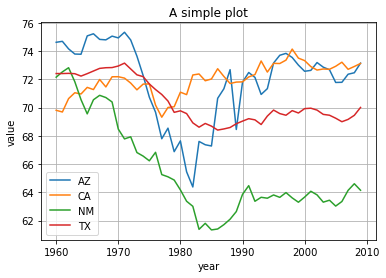

In [41]:
#需要展示什么数据只需要修改y变量即可
x=np.arange(1960,2010)
print(x)
y=score
plt.plot(x,y[:,0], lw = 1.5,label = stateSet[0])
plt.plot(x,y[:,1], lw = 1.5, label = stateSet[1])
plt.plot(x,y[:,2], lw = 1.5,label = stateSet[2])
plt.plot(x,y[:,3], lw = 1.5, label = stateSet[3])
plt.grid(True)
plt.legend(loc = 0) #图例位置自动
plt.axis('tight')
plt.xlabel('year')
plt.ylabel('value')
plt.title('A simple plot')
p1= r'test1.png'# 图片保存路径
plt.savefig(p1)# 保存图片
plt.show()


In [42]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [43]:
from statsmodels.graphics.api import qqplot

In [137]:
data=score[:40,0]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','1999'))
dta.plot(figsize=(12,8))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
arma_mod30 = sm.tsa.ARMA(dta, (4,2)).fit(disp=False)
print(arma_mod30.params)
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=30, ax=ax2)
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,40), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
predict_sunspots = arma_mod30.predict('2000', '2050', dynamic=True)
print(predict_sunspots)

const      72.390757
ar.L1.y     0.788331
ar.L2.y     0.101473
dtype: float64


//anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


const      72.439472
ar.L1.y     0.279696
ar.L2.y    -0.426475
ar.L3.y     0.696110
ar.L4.y     0.205427
ma.L1.y     0.541689
ma.L2.y     1.000000
dtype: float64
            AC          Q  Prob(>Q)
lag                                
1.0   0.037603   0.060911  0.805062
2.0   0.121493   0.713478  0.699955
3.0   0.115015   1.314125  0.725782
4.0   0.137711   2.199125  0.699190
5.0   0.156693   3.377658  0.641975
6.0  -0.115957   4.042051  0.670986
7.0   0.036339   4.109277  0.767108
8.0  -0.029563   4.155161  0.842860
9.0  -0.168228   5.688873  0.770608
10.0 -0.015351   5.702069  0.839642
11.0 -0.218687   8.472568  0.670450
12.0 -0.040524   8.571102  0.739061
13.0 -0.147104   9.917559  0.700662
14.0 -0.135646  11.106472  0.677652
15.0 -0.137177  12.371003  0.650758
16.0 -0.149834  13.942515  0.602996
17.0 -0.074456  14.347446  0.642373
18.0 -0.012019  14.358477  0.705441
19.0 -0.058274  14.630146  0.745797
20.0 -0.058004  14.912765  0.781377
21.0 -0.060713  15.238695  0.810787
22.0 -0.04

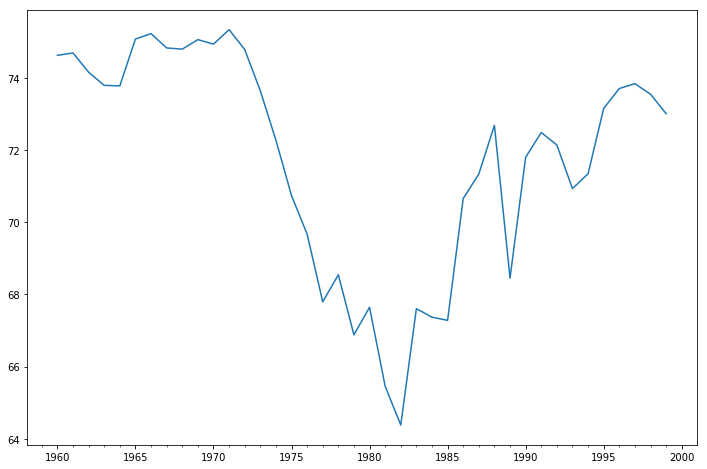

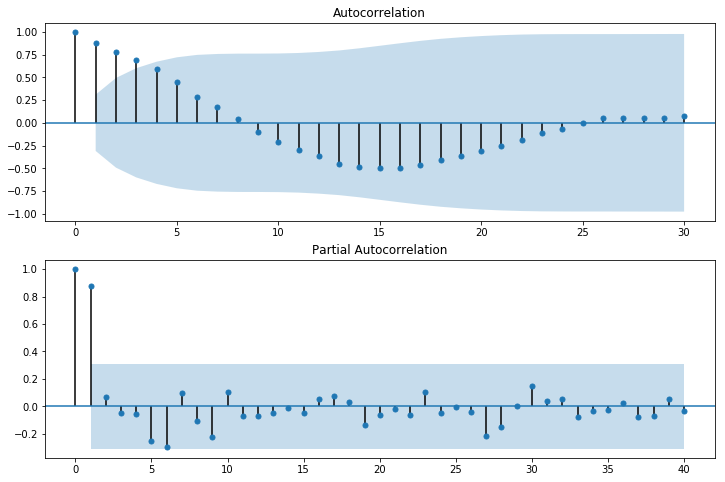

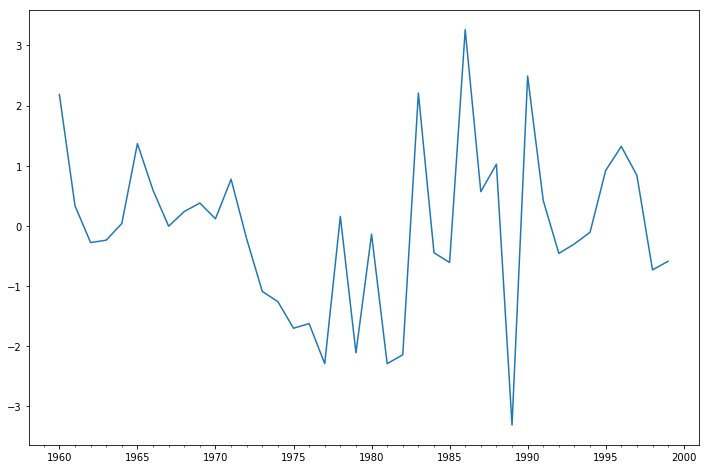

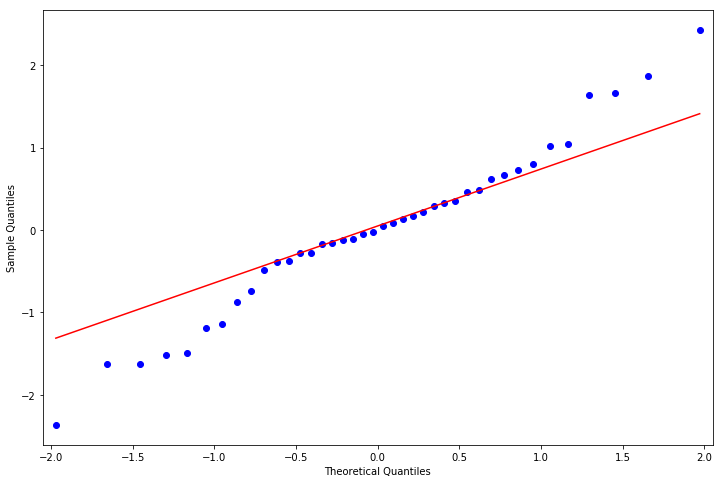

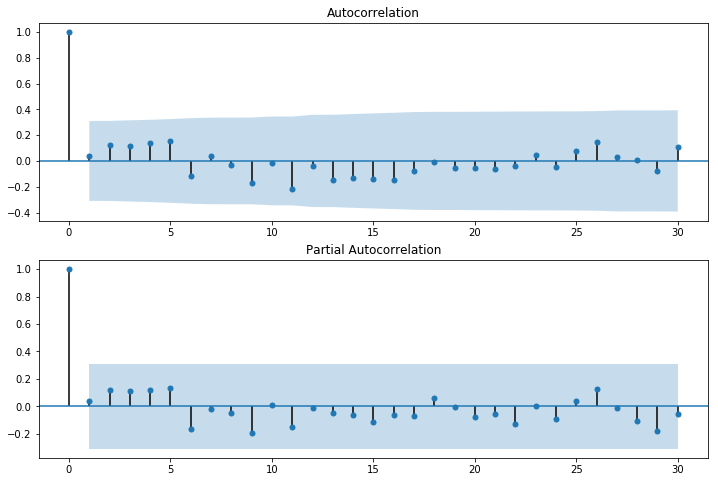

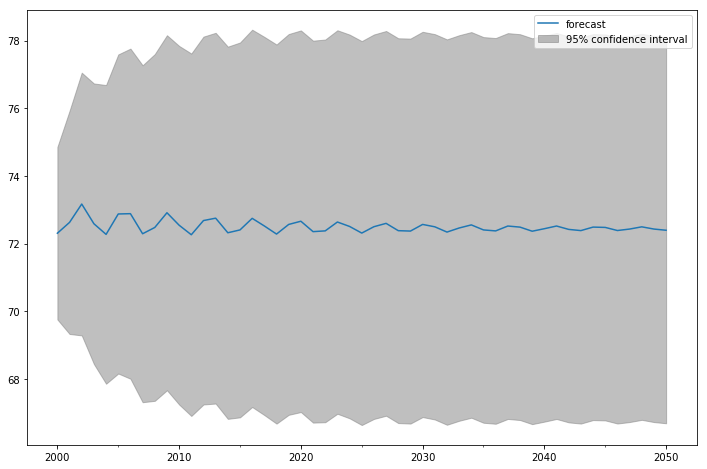

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = arma_mod30.plot_predict('2000', '2050', dynamic=True, ax=ax, plot_insample=False)
plt.show()
#plt.legend(loc = 0) #图例位置自动

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


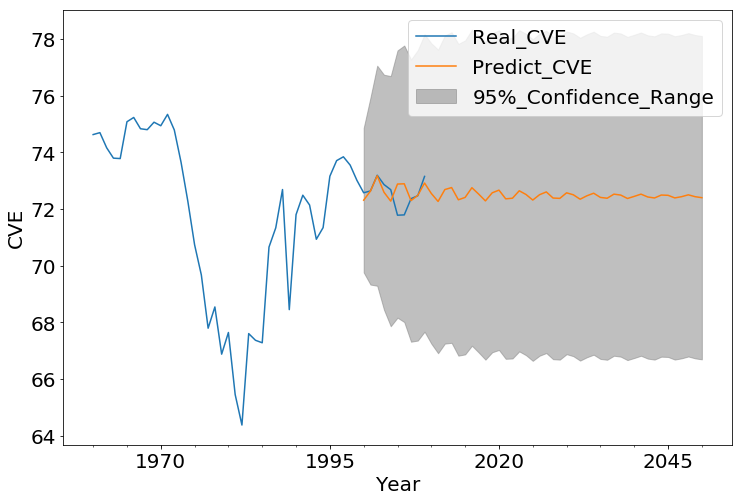

In [139]:
fig, ax = plt.subplots(figsize=(12, 8))
data=score[:,0]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
ax = dta.ix['1960':].plot(ax=ax)
plt.xlabel('Year',fontsize=20)
plt.ylabel('CVE',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
'''
None Real_CVE
Forcast Predict_CVE
'''
# plt.title('A simple plot')
fig = arma_mod30.plot_predict('2000', '2050', dynamic=True, ax=ax, plot_insample=False)
plt.legend(labels = ['Real_CVE', 'Predict_CVE','95%_Confidence_Range'], loc = 'best',fontsize=20)
#plt.legend(loc = 0) #图例位置自动
p1= r'score1.png'# 图片保存路径
plt.savefig(p1)# 保存图片
plt.show()

In [140]:
data=score[:40,1]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','1999'))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
arma_mod30 = sm.tsa.ARMA(dta, (7,3)).fit(disp=False)
print(arma_mod30.params)
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=30, ax=ax2)
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,40), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
predict_sunspots = arma_mod30.predict('2000', '2050', dynamic=True)
print(predict_sunspots)

const      71.710563
ar.L1.y     0.843928
ar.L2.y     0.043904
dtype: float64
const      71.744200
ar.L1.y     0.397217
ar.L2.y     0.071198
ar.L3.y    -0.402311
ar.L4.y     0.623318
ar.L5.y     0.034230
ar.L6.y    -0.237296
ar.L7.y     0.180357
ma.L1.y     0.514949
ma.L2.y     0.514949
ma.L3.y     1.000000
dtype: float64
            AC          Q  Prob(>Q)
lag                                
1.0   0.022320   0.021459  0.883535
2.0  -0.119626   0.654126  0.721038
3.0  -0.047755   0.757676  0.859561
4.0   0.081661   1.068877  0.899178
5.0   0.018870   1.085969  0.955338
6.0  -0.045182   1.186839  0.977530
7.0  -0.099503   1.690880  0.974957
8.0   0.015821   1.704021  0.988781
9.0  -0.211228   4.121988  0.903202
10.0 -0.057550   4.307458  0.932413
11.0  0.129342   5.276608  0.917034
12.0  0.116993   6.097850  0.911069
13.0  0.118498   6.971565  0.903611
14.0 -0.196859   9.475642  0.799428
15.0  0.062278   9.736278  0.835993
16.0  0.202777  12.614584  0.700701
17.0  0.123934  13.736513  0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


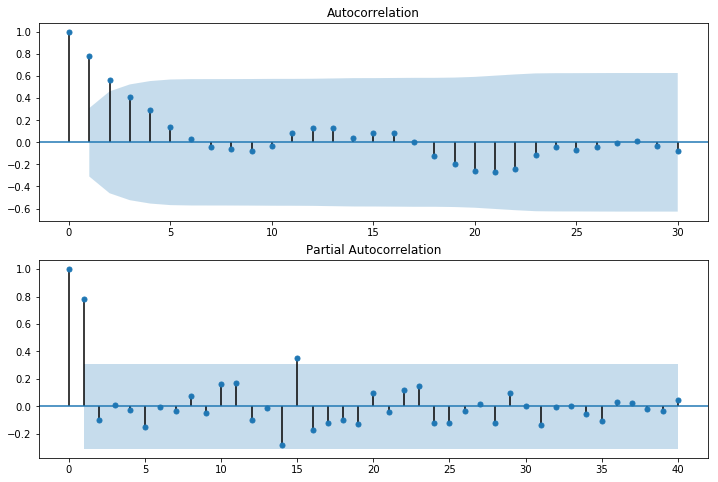

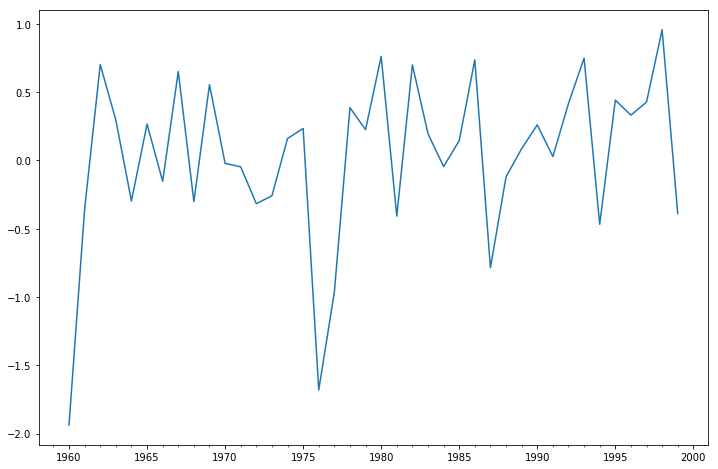

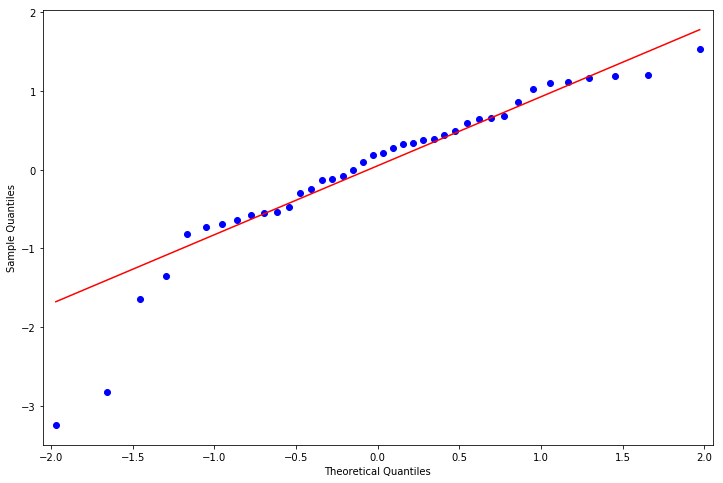

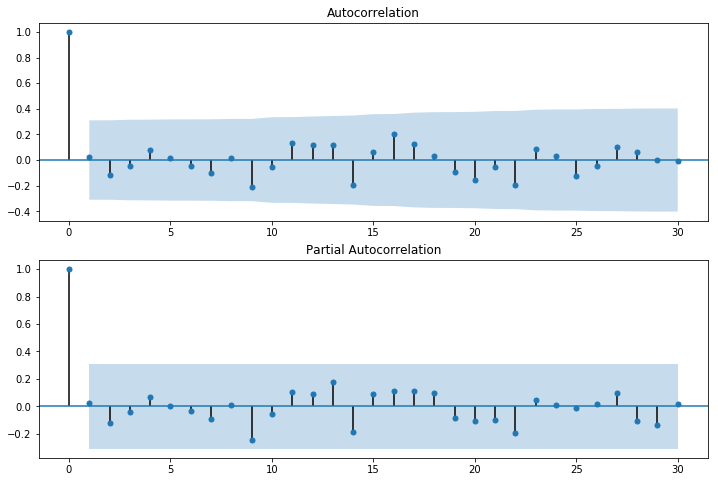

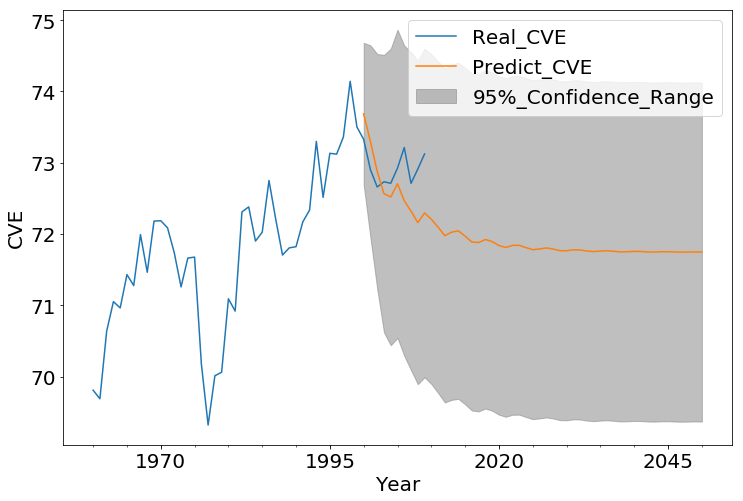

In [141]:
fig, ax = plt.subplots(figsize=(12, 8))
data=score[:,1]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
ax = dta.ix['1960':].plot(ax=ax)
plt.xlabel('Year',fontsize=20)
plt.ylabel('CVE',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
'''
None Real_CVE
Forcast Predict_CVE
'''
# plt.title('A simple plot')
fig = arma_mod30.plot_predict('2000', '2050', dynamic=True, ax=ax, plot_insample=False)
plt.legend(labels = ['Real_CVE', 'Predict_CVE','95%_Confidence_Range'], loc = 'best',fontsize=20)
#plt.legend(loc = 0) #图例位置自动
p1= r'score2.png'# 图片保存路径
plt.savefig(p1)# 保存图片
plt.show()

In [142]:
data=score[:40,2]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','1999'))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
arma_mod30 = sm.tsa.ARMA(dta, (5,3)).fit(disp=False)
print(arma_mod30.params)
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=30, ax=ax2)
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,40), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
predict_sunspots = arma_mod30.predict('2000', '2050', dynamic=True)
print(predict_sunspots)

const      67.058668
ar.L1.y     1.178086
ar.L2.y    -0.198575
dtype: float64


//anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


const      67.261298
ar.L1.y     0.944769
ar.L2.y    -0.040197
ar.L3.y    -0.878859
ar.L4.y     1.009566
ar.L5.y    -0.081570
ma.L1.y     0.175059
ma.L2.y     0.175059
ma.L3.y     1.000000
dtype: float64
            AC          Q  Prob(>Q)
lag                                
1.0   0.035808   0.055234  0.814195
2.0   0.057070   0.199225  0.905188
3.0  -0.084508   0.523491  0.913701
4.0  -0.055359   0.666508  0.955394
5.0  -0.062265   0.852600  0.973558
6.0   0.213488   3.104638  0.795604
7.0  -0.004000   3.105453  0.875079
8.0  -0.043771   3.206035  0.920770
9.0   0.023740   3.236579  0.954172
10.0 -0.096134   3.754122  0.957758
11.0 -0.079361   4.118979  0.966306
12.0  0.028826   4.168835  0.980193
13.0 -0.117894   5.033668  0.974444
14.0 -0.034241   5.109424  0.984231
15.0  0.061541   5.363927  0.988571
16.0  0.048934   5.531545  0.992412
17.0 -0.225606   9.249319  0.932114
18.0  0.005053   9.251269  0.953635
19.0 -0.007116   9.255319  0.968994
20.0 -0.124538  10.558138  0.956887
21.0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


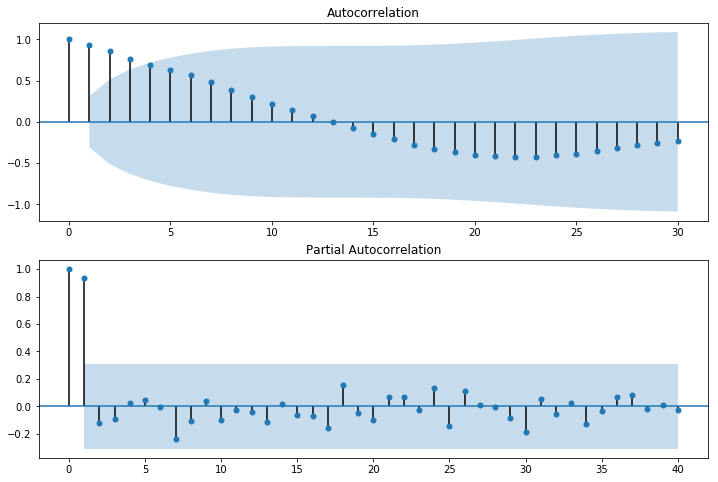

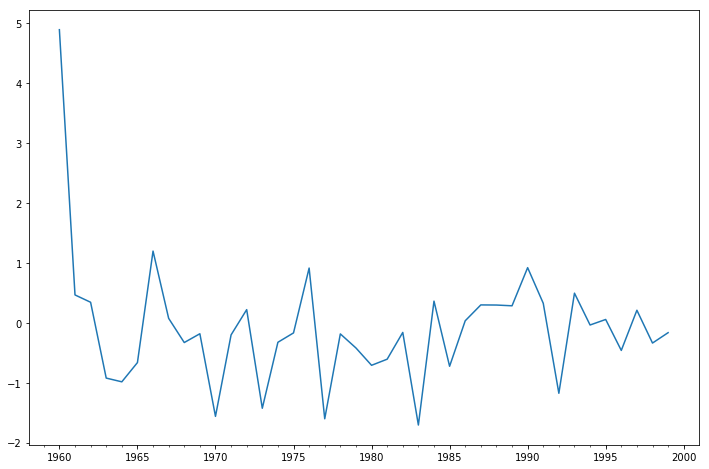

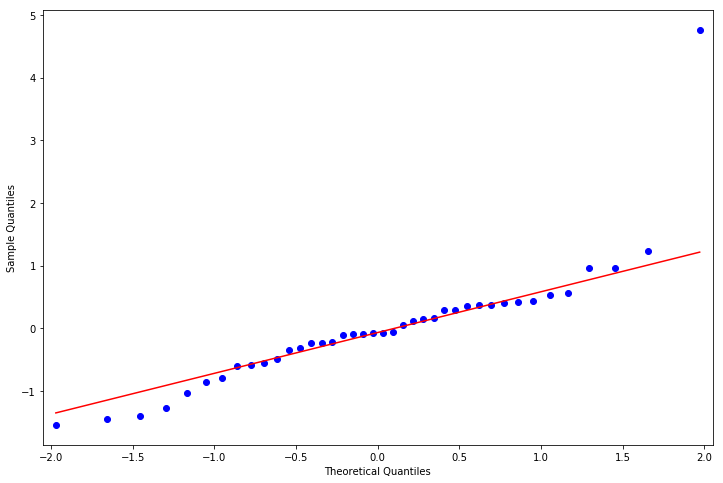

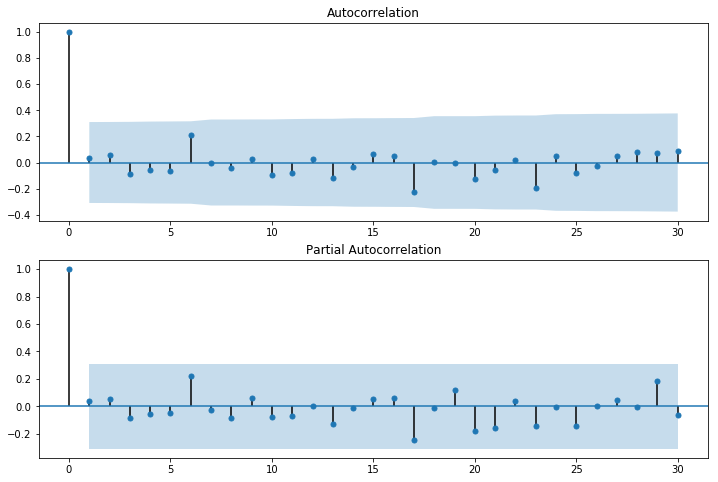

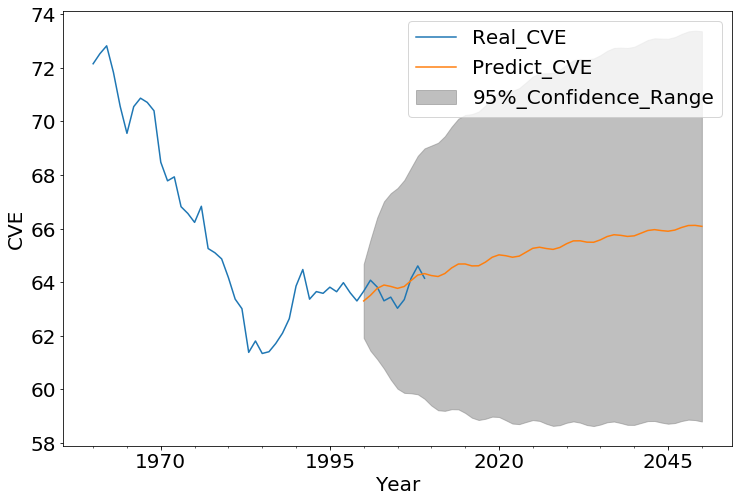

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))
data=score[:,2]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
ax = dta.ix['1960':].plot(ax=ax)
plt.xlabel('Year',fontsize=20)
plt.ylabel('CVE',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
'''
None Real_CVE
Forcast Predict_CVE
'''
# plt.title('A simple plot')
fig = arma_mod30.plot_predict('2000', '2050', dynamic=True, ax=ax, plot_insample=False)
plt.legend(labels = ['Real_CVE', 'Predict_CVE','95%_Confidence_Range'], loc = 'best',fontsize=20)
#plt.legend(loc = 0) #图例位置自动
p1= r'score3.png'# 图片保存路径
plt.savefig(p1)# 保存图片
plt.show()

In [144]:
data=score[:40,3]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','1999'))
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
arma_mod30 = sm.tsa.ARMA(dta, (5,4)).fit(disp=False)
print(arma_mod30.params)
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
resid = arma_mod30.resid
stats.normaltest(resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=30, ax=ax2)
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,40), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
predict_sunspots = arma_mod30.predict('2000', '2050', dynamic=True)
print(predict_sunspots)

const      70.815645
ar.L1.y     1.324198
ar.L2.y    -0.349797
dtype: float64


//anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


const      70.775090
ar.L1.y     1.082946
ar.L2.y     0.029052
ar.L3.y     0.051531
ar.L4.y    -0.249817
ar.L5.y     0.038213
ma.L1.y     0.186614
ma.L2.y    -0.389536
ma.L3.y     0.186614
ma.L4.y     1.000000
dtype: float64
            AC          Q  Prob(>Q)
lag                                
1.0   0.020067   0.017346  0.895217
2.0   0.017207   0.030436  0.984897
3.0   0.004421   0.031324  0.998539
4.0  -0.035048   0.088646  0.999046
5.0   0.108833   0.657188  0.985235
6.0   0.107267   1.225731  0.975595
7.0   0.143536   2.274591  0.943094
8.0  -0.035418   2.340448  0.968756
9.0  -0.009062   2.344898  0.984768
10.0  0.029646   2.394116  0.992331
11.0  0.058987   2.595685  0.995064
12.0 -0.225655   5.650889  0.932648
13.0 -0.086298   6.114275  0.941895
14.0 -0.006318   6.116854  0.963460
15.0 -0.159510   7.826659  0.930544
16.0  0.020259   7.855391  0.953055
17.0 -0.085995   8.395554  0.957342
18.0  0.046945   8.563849  0.969007
19.0 -0.188161  11.396200  0.909791
20.0  0.153783  13.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


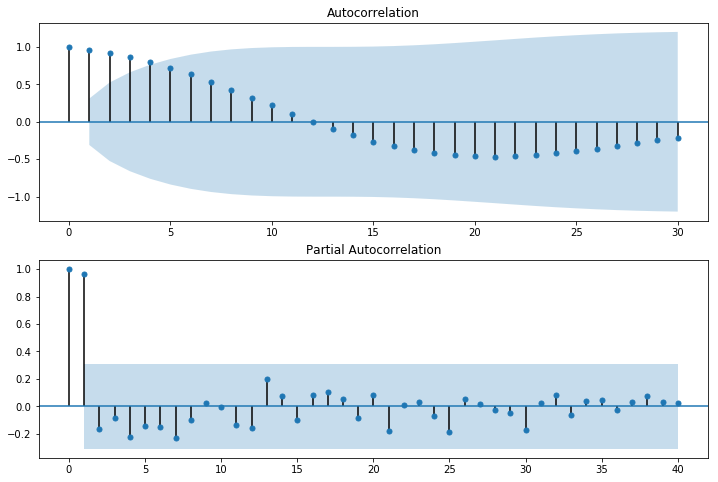

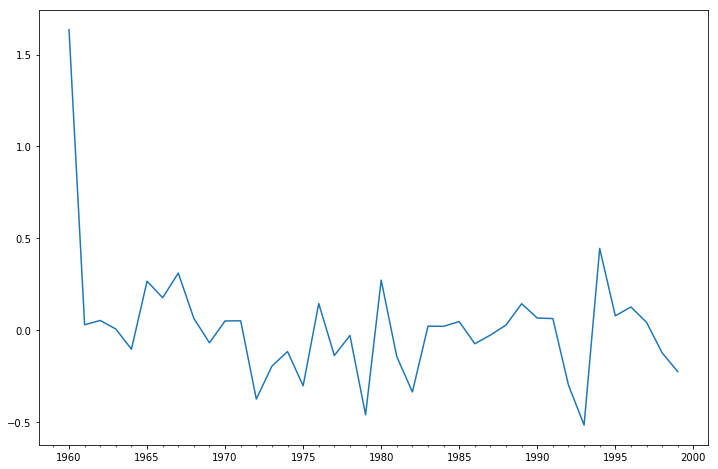

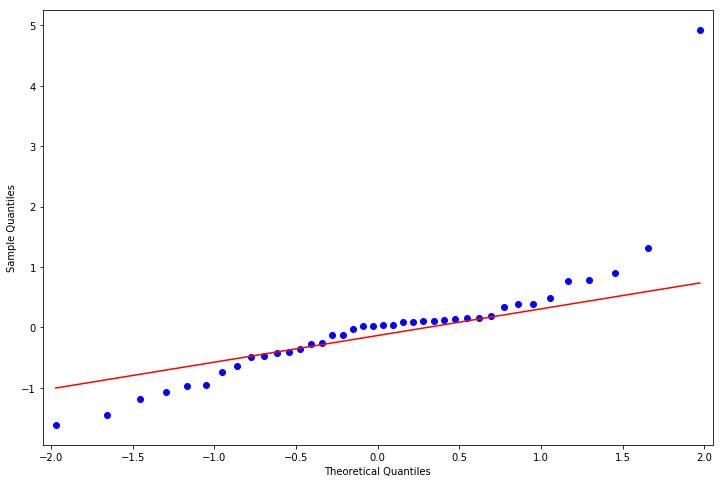

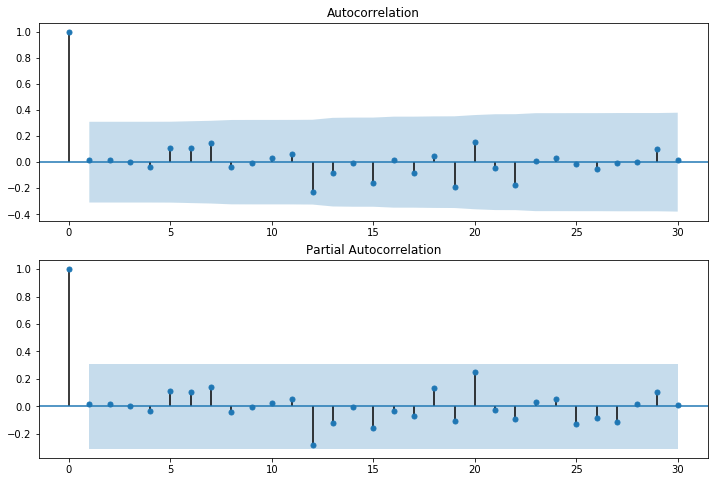

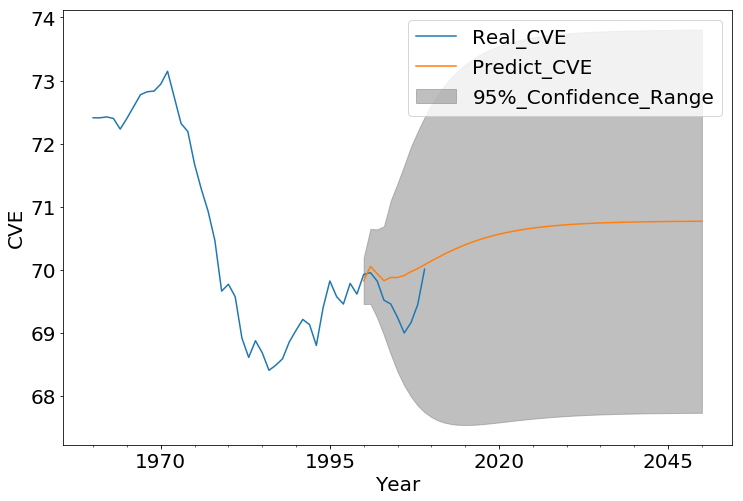

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))
data=score[:,3]
dta=pd.Series(data)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1960','2009'))
ax = dta.ix['1960':].plot(ax=ax)
plt.xlabel('Year',fontsize=20)
plt.ylabel('CVE',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
'''
None Real_CVE
Forcast Predict_CVE
'''
# plt.title('A simple plot')
fig = arma_mod30.plot_predict('2000', '2050', dynamic=True, ax=ax, plot_insample=False)
plt.legend(labels = ['Real_CVE', 'Predict_CVE','95%_Confidence_Range'], loc = 'best',fontsize=20)
#plt.legend(loc = 0) #图例位置自动
p1= r'score4.png'# 图片保存路径
plt.savefig(p1)# 保存图片
plt.show()